## Практическое задание

  1. Постройте нейронную сеть(берем простую линейную сеть, которую разбирали на уроке: меняем число слоев, число нейронов , типы активации, тип оптимизатора)  на датасет from sklearn.datasets import load_boston. 
  2. Измените функцию потерь и метрику для этой задачи. Постройте 10-15 вариантов и сведите результаты их работы в таблицу  Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

  3. Поработайте с документацией TensorFlow 2. Найти 2-3 полезные команды TensorFlow, не разобранные на уроке (полезные для Вас).

  1-2. (*)  Попробуйте обучить нейронную сеть на TensorFlow 2 на датасете imdb_reviews .Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?
    


###  `1. Постройте нейронную сеть(берем простую линейную сеть, которую разбирали на уроке: меняем число слоев, число нейронов , типы активации, тип оптимизатора)  на датасет from sklearn.datasets import load_boston.`

In [1]:
# загружаем данные

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [2]:
# смотрим, что загрузилось

print(train_data.shape)
print(test_data.shape)

(404, 13)
(102, 13)


In [3]:
# нормализуем данные

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_norm = train_data.copy()
df_norm = scaler.fit_transform(df_norm)
train_data = df_norm.copy()

df_norm = test_data.copy()
df_norm = scaler.fit_transform(df_norm)
test_data = df_norm.copy()

In [4]:
# заготовка модели для запусков и экспериментов

from keras import models
from keras import layers

def run_madel(loss_='mse',metrics_=['mae'], verbose_=1, n_neiro=128, epochs=10, batch_size=1):
    
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(n_neiro, activation='relu'))
    model.add(layers.Dense(n_neiro, activation='relu'))
    model.add(layers.Dense(1, activation='relu'))

    model.compile(optimizer='adam',
                  loss=loss_,
                  metrics=metrics_)
    
     # учим сеть
    history = model.fit(
        train_data, 
        train_targets, 
        epochs=epochs, 
        batch_size=batch_size, 
    #     validation_split=0.2, 
        verbose=verbose_
    )   
    
    # смотрим результаты
    loss, metrics = model.evaluate(test_data, test_targets, verbose=verbose_)
    
    return loss, metrics

In [5]:
# смотрим, значени по-умолчанию

print('loss = %f, metrics= %f' % run_madel(verbose_ = 1))

Epoch 1/10
404/404 [==============================] - 1s 688us/step - loss: 183.7813 - mae: 10.3399
Epoch 2/10
404/404 [==============================] - 0s 692us/step - loss: 15.2238 - mae: 2.9202
Epoch 3/10
404/404 [==============================] - 0s 685us/step - loss: 12.8787 - mae: 2.6666
Epoch 4/10
404/404 [==============================] - 0s 680us/step - loss: 12.8423 - mae: 2.6591
Epoch 5/10
404/404 [==============================] - 0s 694us/step - loss: 9.7174 - mae: 2.2617
Epoch 6/10
404/404 [==============================] - 0s 717us/step - loss: 8.8323 - mae: 2.1822
Epoch 7/10
404/404 [==============================] - 0s 699us/step - loss: 9.7516 - mae: 2.2597
Epoch 8/10
404/404 [==============================] - 0s 672us/step - loss: 8.7986 - mae: 2.2136
Epoch 9/10
404/404 [==============================] - 0s 670us/step - loss: 8.8501 - mae: 2.1845
Epoch 10/10
4/4 [==============================] - 0s 1ms/step - loss: 24.9543 - mae: 3.0664
loss = 24.954250, metrics= 3

###  `2. Измените функцию потерь и метрику для этой задачи. Постройте 10-15 вариантов и сведите результаты их работы в таблицу  Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?`

In [6]:
loss_ = ['mae', 'mape', 'msle', 'LogCosh']
metrics_ = [['msle'], ['mse'], ['mape']]

for loss in loss_:
    for metrics in metrics_:
        print('loss = %f, metrics= %f' % run_madel(loss_=loss, metrics_ = metrics, verbose_ = 0))


loss = 3.116613, metrics= 0.052575
loss = 3.280751, metrics= 26.110519
loss = 2.965489, metrics= 14.761155
loss = 16.832453, metrics= 0.065467
loss = 15.025831, metrics= 20.189882
loss = 15.931511, metrics= 15.931511
loss = 0.038507, metrics= 0.038507
loss = 0.041240, metrics= 19.614079
loss = 0.044105, metrics= 15.497736
loss = 2.306152, metrics= 0.038664
loss = 2.572481, metrics= 22.699156
loss = 2.302331, metrics= 14.308604


`Как мы можем сравнивать результаты по разным метрикам?`

`Ниже пробую разные комбинации параметров и ищу лучший результат.`

In [44]:
n_neiro_ = [128,256,512,1024]
epochs_ = [3,5,10,15]
batch_size_ = [10,50,100,200]

mae_min = 100
result = [0,0,0,0]

for n_neiro in n_neiro_:
    for epochs in epochs_:
        print('*', end =" ")
        for batch_size in batch_size_:
            res = run_madel(n_neiro=n_neiro, epochs=epochs, batch_size=batch_size, verbose_ = 0)
            if res[1] < mae_min:
                mae_min = res[1]
                result = [n_neiro, epochs, batch_size, mae_min]
                
print('')
print('Лучшие параметры Нейроны/Эпохи/Батч/Accuracy: ', result)

* * * * * * * * * * * * * * * * 
Лучшие параметры Нейроны/Эпохи/Батч/Accuracy:  [512, 15, 10, 2.740905523300171]


In [46]:
res = run_madel(n_neiro=512, epochs=15, batch_size=10, verbose_ = 0)
res

(15.217385292053223, 2.584104537963867)

###  `Ниже для себя: Ищу лучшие параметры для fashion_mnist`

In [47]:
# загружаем fashion_mnist

from tensorflow import keras
from tensorflow.keras.utils import to_categorical

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [48]:
# подготовка данных

y_train_labels = to_categorical(train_labels)
y_test_labels = to_categorical(test_labels)

train_images = train_images / 255.0
test_images = test_images / 255.0

In [49]:
# заготовка модели для запусков и экспериментов

from tensorflow.keras.layers import Input, Flatten
from tensorflow.keras.models import Model
import tensorflow as tf


def model_run(n_neiro = 128, epochs=10, batch_size=100):
    inputs = Input(shape=(28, 28))
    x_1 = keras.layers.Flatten()(inputs)
    x = keras.layers.Dense(n_neiro, activation='relu')(x_1)
    outputs = keras.layers.Dense(10)(x)

    model = keras.Model(inputs, outputs)

    # model.summary()

    model.compile(optimizer='adam',   
                  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                  metrics = 'accuracy')

    history = model.fit(train_images, y_train_labels, epochs=epochs, batch_size=batch_size, verbose=0)

    test_loss, test_acc = model.evaluate(test_images,  y_test_labels, verbose=0)
#     print('Кол-воНейр=',n_neiro, 'Эпох=',epochs, 'РазмБатча=',batch_size, 'Метрика=',test_acc)

    return n_neiro, epochs, batch_size, test_acc


In [50]:
# смотрим результаты с параметрами по-умолчанию

print(model_run())

(128, 10, 100, 0.8847000002861023)


In [51]:
# в цикле ищем лучшие параметры

n_neiro_ = [128,256,512,1024]
epochs_ = [3,5,10,15]
batch_size_ = [10,50,100,200]


# for i in range(5):
#     model_run()
acc_max = [0,0,0,0]


for n_neiro in n_neiro_:
    for epochs in epochs_:
        print('*', end =" ")
        for batch_size in batch_size_:
            res = model_run(n_neiro=n_neiro, epochs=epochs, batch_size=batch_size)
            if res[3] > acc_max[3]:
                acc_max = res
print('')
print('Лучшие параметры Нейроны/Эпохи/Батч/Accuracy: ', acc_max)

* * * * * * * * * * * * * * * * 
Лучшие параметры Нейроны/Эпохи/Батч/Accuracy:  (512, 15, 50, 0.8960999846458435)


`Вывод: без сверточных слоев сильно увеличить точно не получатеся. Максимум .88-.89 `

# 1-2. (*) Попробуйте обучить нейронную сеть на TensorFlow 2 на датасете imdb_reviews .Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

In [52]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

In [53]:
imdb = keras.datasets.imdb

In [54]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow-2.4.1-py3.8-win-amd64.egg\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow-2.4.1-py3.8-win-amd64.egg\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

In [55]:
print(train_data.shape)
print(test_data.shape)

(25000,)
(25000,)


In [56]:
len(train_data[0]), len(train_data[1])

(218, 189)

In [57]:
# # Индексы словаря связи слов и соотвествующих им чисел
# word_index = imdb.get_word_index()

# # Первые индексы зарезервированы
# word_index = {k:(v+3) for k,v in word_index.items()}
# word_index[""] = 0
# word_index[""] = 1
# word_index[""] = 2 # unknown
# word_index[""] = 3

# reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# def decode_review(text):
#     return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [58]:
# decode_review(train_data[1])

In [59]:
# стандартизируем длину примеров

train_data = keras.preprocessing.sequence.pad_sequences(
    train_data, 
#     value=word_index[""], 
    padding='post', 
    maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(
    test_data, 
#     value=word_index[""], 
    padding='post', 
    maxlen=256)

In [60]:
len(train_data[0]), len(train_data[1])

(256, 256)

In [61]:
# вводная форма - размер словаря, используемого для отзывов (10 000 слов)
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(256, activation='relu'))

model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_300"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense_1330 (Dense)           (None, 256)               4352      
_________________________________________________________________
dense_1331 (Dense)           (None, 256)               65792     
_________________________________________________________________
dense_1332 (Dense)           (None, 1)                 257       
Total params: 230,401
Trainable params: 230,401
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [63]:
history = model.fit(train_data,
                    train_labels,
                    epochs=50,
                    batch_size=256,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/50
79/79 [==============================] - 2s 12ms/step - loss: 0.6818 - accuracy: 0.5571 - val_loss: 0.4443 - val_accuracy: 0.8146
Epoch 2/50
79/79 [==============================] - 1s 10ms/step - loss: 0.3471 - accuracy: 0.8621 - val_loss: 0.3030 - val_accuracy: 0.8754
Epoch 3/50
79/79 [==============================] - 1s 9ms/step - loss: 0.2231 - accuracy: 0.9179 - val_loss: 0.2939 - val_accuracy: 0.8824
Epoch 4/50
79/79 [==============================] - 1s 9ms/step - loss: 0.1677 - accuracy: 0.9393 - val_loss: 0.2926 - val_accuracy: 0.8880
Epoch 5/50
79/79 [==============================] - 1s 10ms/step - loss: 0.1316 - accuracy: 0.9552 - val_loss: 0.3173 - val_accuracy: 0.8844
Epoch 6/50
79/79 [==============================] - 1s 10ms/step - loss: 0.1068 - accuracy: 0.9648 - val_loss: 0.3506 - val_accuracy: 0.8834
Epoch 7/50
79/79 [==============================] - 1s 10ms/step - loss: 0.0801 - accuracy: 0.9762 - val_loss: 0.3891 - val_accuracy: 0.8796
Epoch 8/50
79/7

In [64]:
results = model.evaluate(test_data, test_labels)

print(results)

782/782 [==============================] - 1s 813us/step - loss: 1.5872 - accuracy: 0.8415
[1.5872459411621094, 0.841480016708374]


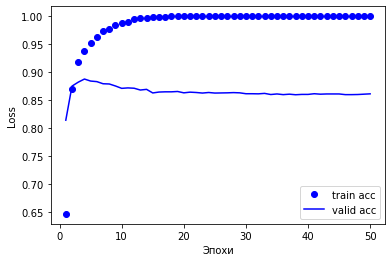

In [65]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='train acc')
plt.plot(epochs, val_acc, 'b', label='valid acc')
plt.xlabel('Эпохи')
plt.ylabel('Loss')
plt.legend()

plt.show()

`Добиться приемлемого результата получилось только при использовании Embedding слоя.`

`Без него точность не поднималась больше 54-55%`